### Imports and Loading the Data

In [74]:
# Imports:
import pandas as pd
import numpy as np
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [75]:
data = pd.read_csv('velocityx_data.csv')

In [76]:
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


### Data Cleansing and Preprocessing

In [77]:
print("Missing values in each column:\n", data.isnull().sum())


Missing values in each column:
 User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64


In this dataset, there were no missing values. If there were, they would be removed with either fillna (replacing the missing data cells with the average) or dropna (removing the rows with missing values).

### Data Analysis

C:\Users\v3476\AppData\Local\Temp\ipykernel_2824\2599575196.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


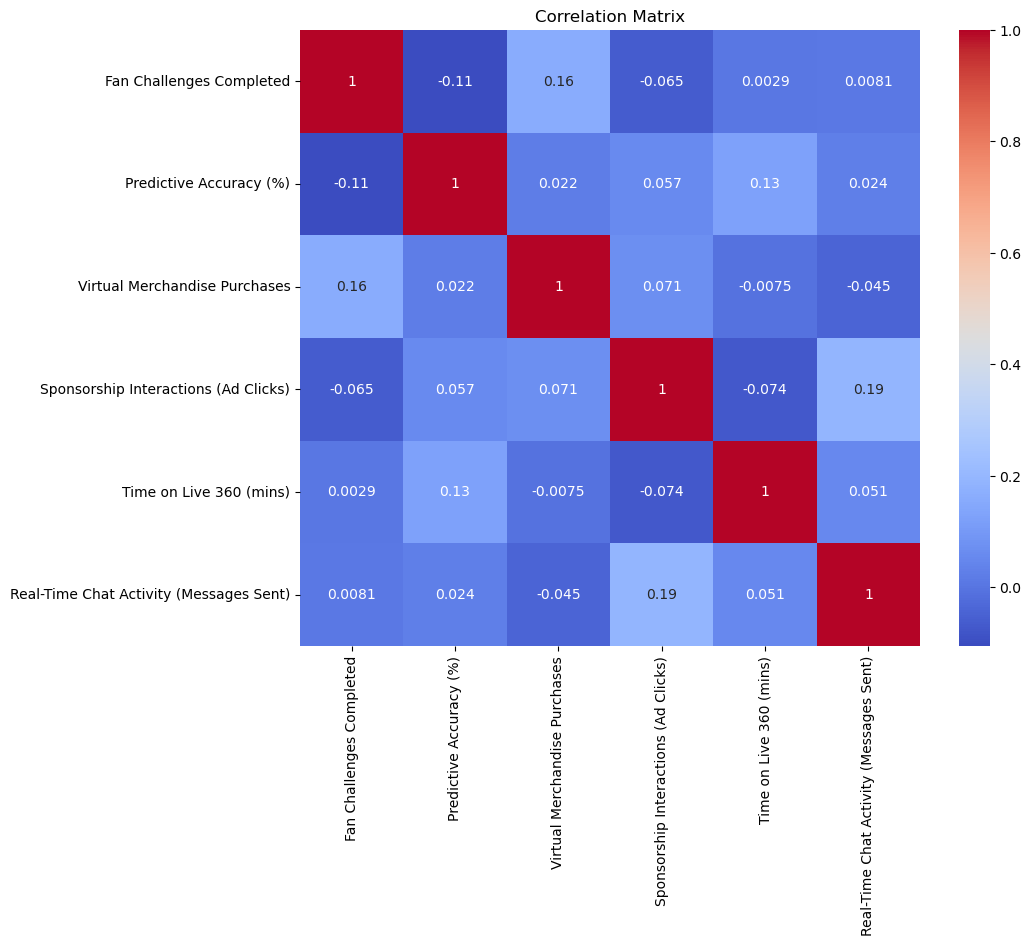

In [78]:
# Correlation matrix to see how each variable is related

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


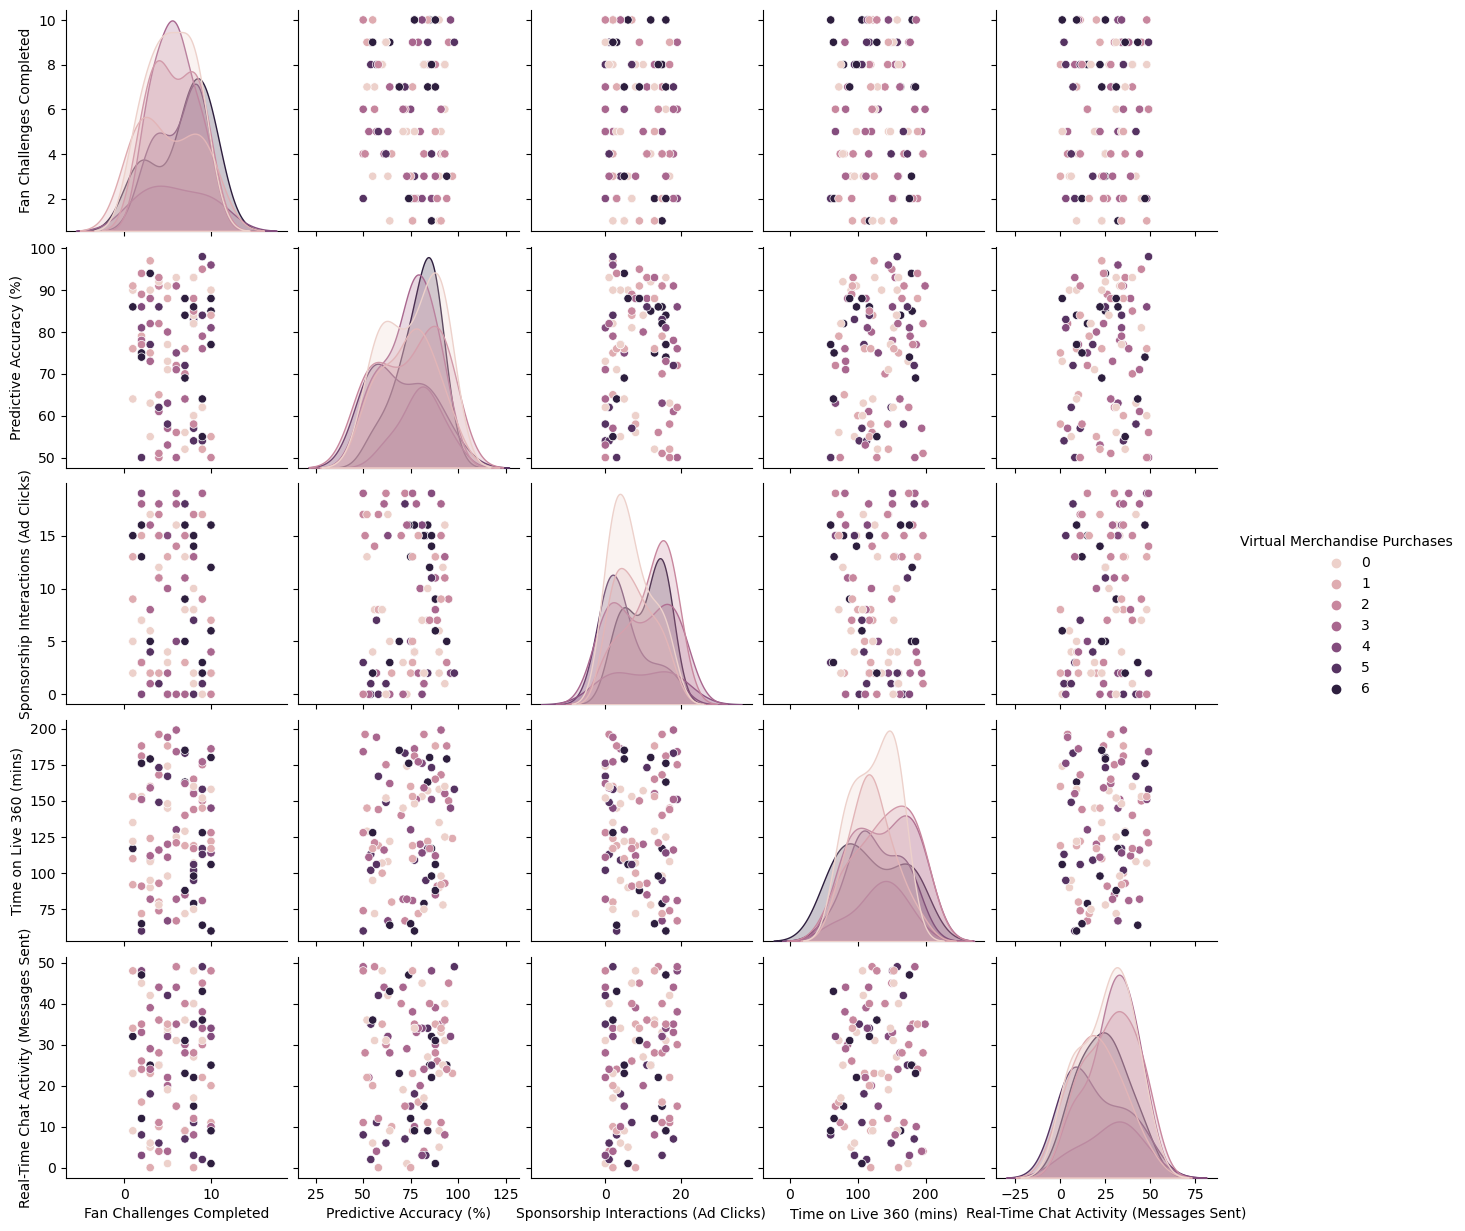

In [79]:
# Virtual merch vs others

sns.pairplot(data, hue='Virtual Merchandise Purchases')
plt.show()


### Finding any outliers

In [80]:
dataOutliers = data

In [81]:
# Using IQR

columns_to_check = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']

# Function to find outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check each column for outliers
for column in columns_to_check:
    outliers = find_outliers_iqr(dataOutliers, column)
    if not outliers.empty:
        print(f"Outliers detected in column: {column}")
        print(outliers)
    else:
        print(f"No Outliers Found in column: {column}")


No Outliers Found in column: Fan Challenges Completed
No Outliers Found in column: Predictive Accuracy (%)
No Outliers Found in column: Virtual Merchandise Purchases
No Outliers Found in column: Sponsorship Interactions (Ad Clicks)
No Outliers Found in column: Time on Live 360 (mins)
No Outliers Found in column: Real-Time Chat Activity (Messages Sent)


In [82]:
# Using Z-scores

z_scores = np.abs(stats.zscore(dataOutliers[columns_to_check]))

# Set a threshold (In this case, 2)
outliers = (z_scores >= 2).any(axis=1)

# Get outlier rows
if not outlier_rows.empty:
    outlier_rows = dataOutliers[outliers]
    print("Outlier Rows:\n", outlier_rows)
else:
    print("No outliers found")


No outliers found


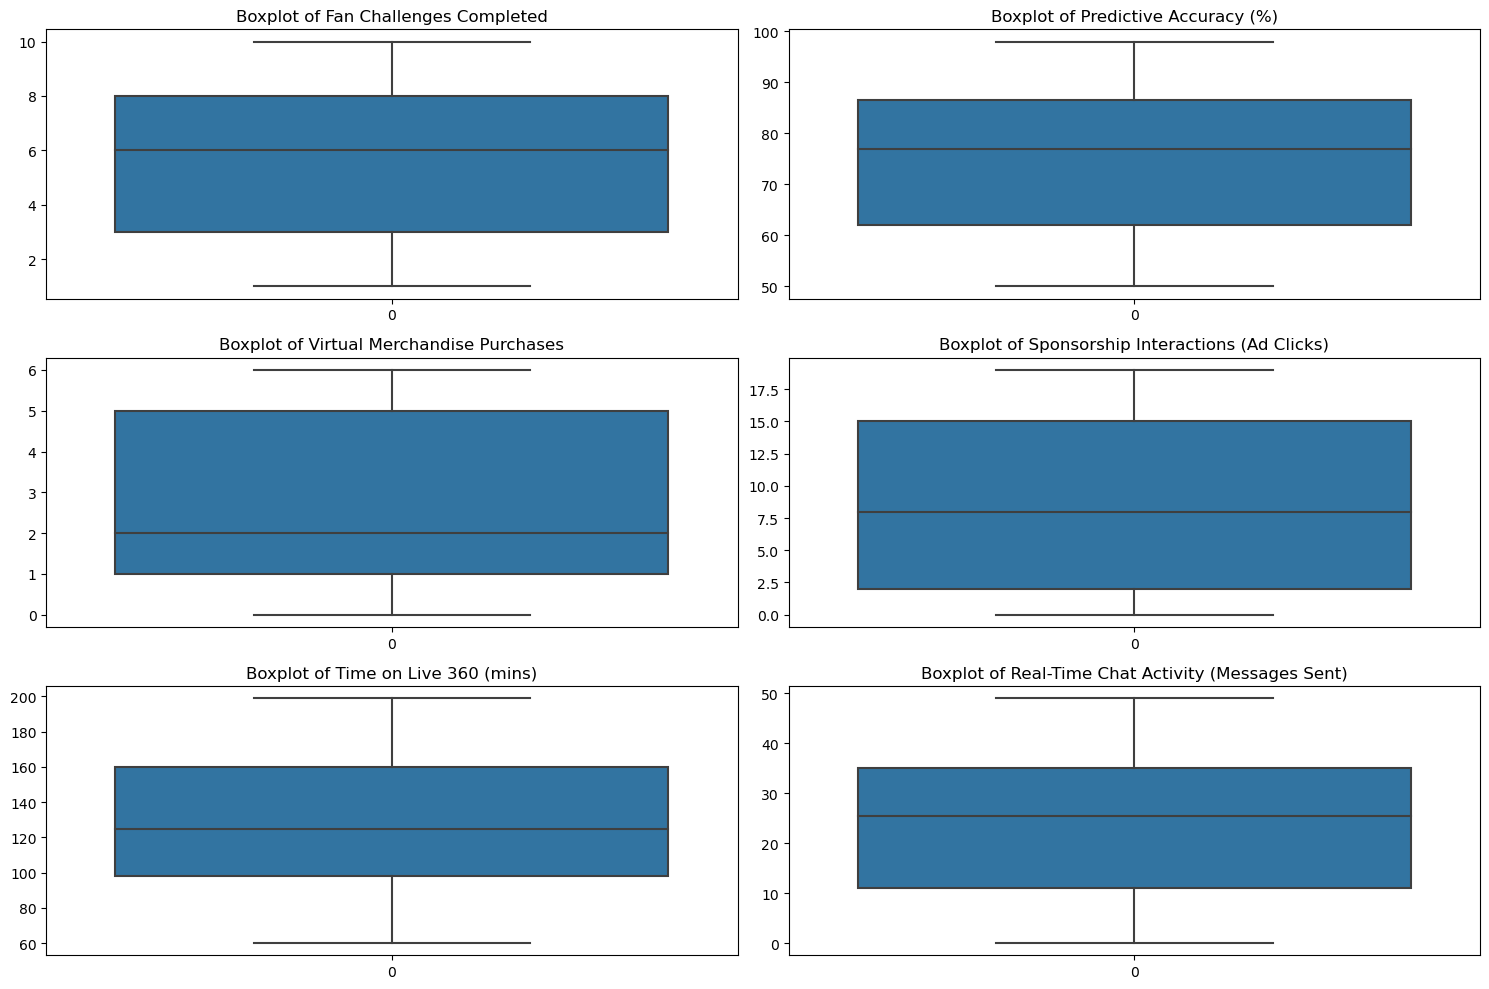

In [83]:
# Box plots

# Visualize each column with a boxplot to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In the box plots above, and by using the IQR and Z score calculations, we can confirm that none of the rows have any outliers. If there were outliers, we could either remove them, or knowingly leave them in to see how they impact the predictive models. 

### Clustering Analysis

In [84]:
# Scaling the features for clustering

features_for_clustering = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features_for_clustering])


In [85]:
# Use K-Means Clustering (3 clusters for simplicity)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


C:\Users\v3476\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\v3476\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


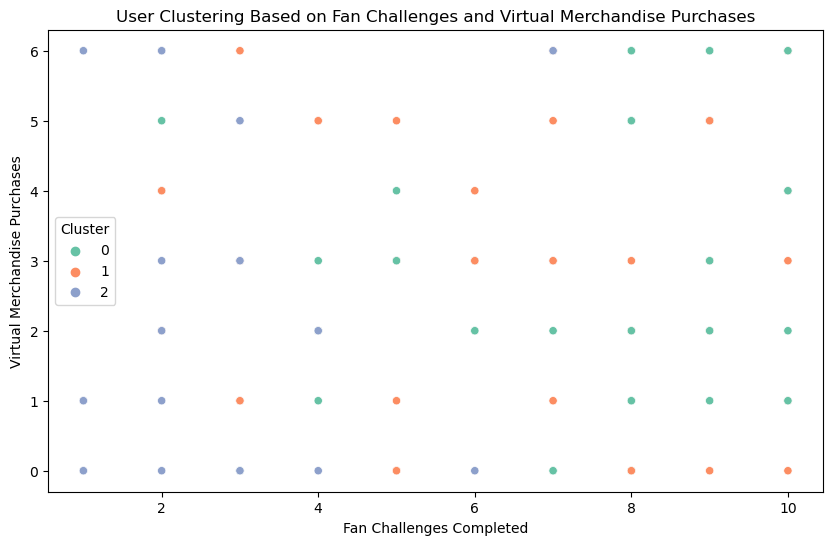

In [86]:
# Plot the Clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Fan Challenges Completed'], y=data['Virtual Merchandise Purchases'], hue=data['Cluster'], palette='Set2')
plt.title('User Clustering Based on Fan Challenges and Virtual Merchandise Purchases')
plt.show()


### Predicting if a Virtual Merchandise Purchase will be made

In [87]:
# Prepare the data for the model

X = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]

# Yes or no to purchases
y = data['Virtual Merchandise Purchases'] > 0


In [88]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [89]:
# Train the Random Forest Classifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [90]:
# Evaluate the model

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00         5
        True       0.82      0.92      0.87        25

    accuracy                           0.77        30
   macro avg       0.41      0.46      0.43        30
weighted avg       0.68      0.77      0.72        30



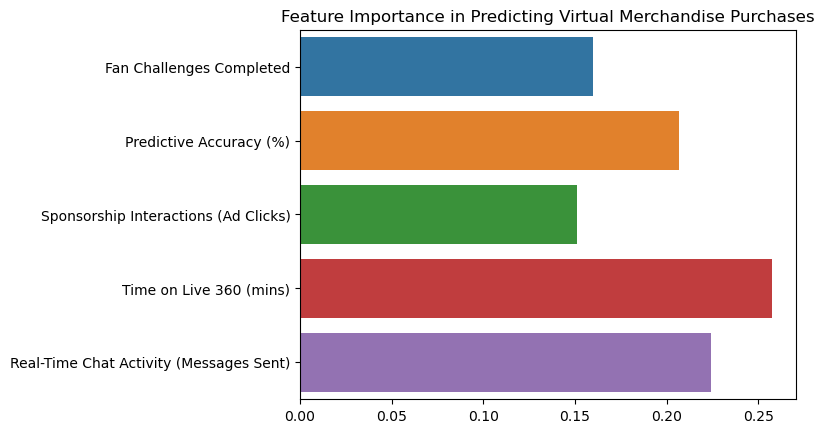

In [91]:
# Feature Importance

feature_importance = model.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance in Predicting Virtual Merchandise Purchases')
plt.show()


### Predicting how many purchases will be made

In [92]:
# Seperate the dataset

# Features
X = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]
X_plot = data["User ID"]

# Target
y = data['Virtual Merchandise Purchases']


In [93]:
# Split the data for training and testing

X_train, X_test, X_plot_train, X_plot_test, y_train, y_test = train_test_split(X, X_plot, y, test_size=0.2, random_state=42)


In [94]:
# Create and train a regression model

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [95]:
# Make the predictions

y_pred_o = model.predict(X_test)
y_pred = [int(round(val)) for val in y_pred_o]


In [96]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 4.5
R-Squared: -0.07398568019093066


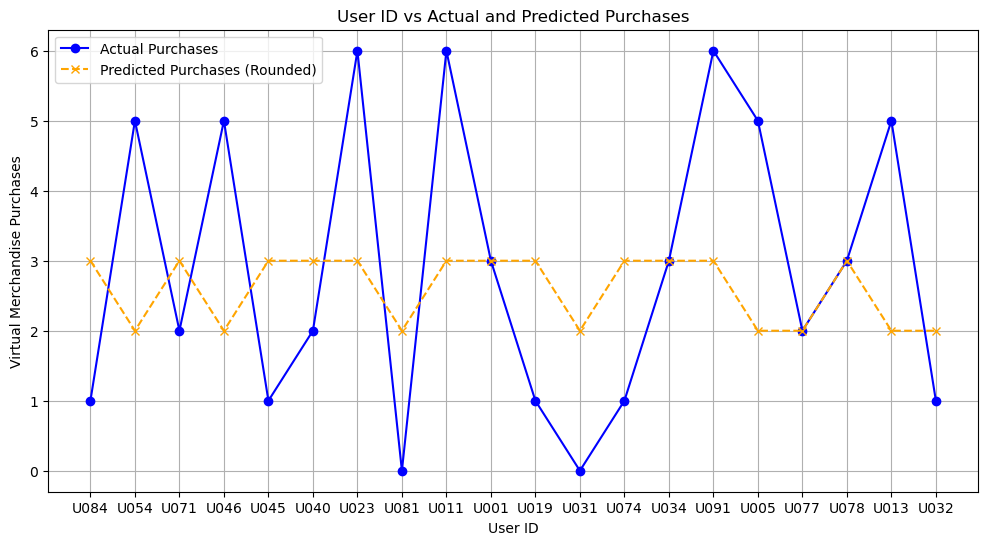

In [97]:
# Plot actual vs predicted values

# Plot User IDs vs actual and predicted (rounded) values
plt.figure(figsize=(12, 6))
plt.plot(X_plot_test, y_test, label="Actual Purchases", marker='o', linestyle='-', color='blue')
plt.plot(X_plot_test, y_pred, label="Predicted Purchases (Rounded)", marker='x', linestyle='--', color='orange')

# Adding title and labels
plt.title("User ID vs Actual and Predicted Purchases")
plt.xlabel("User ID")
plt.ylabel("Virtual Merchandise Purchases")
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Here, we can see that predicting whether or not a purchase will be made is far more accurate than predicting the number of purchases each user will make.

### Propose a new fan challenge based on your analysis, with predicted outcomes for engagement and monetization. 

### Title:

Ultimate Race Day Predictor

### Description:

Fans can predict the outcomes of various race events in real time, with increasing difficulty as the race progresses.
Predictions can be made on elements like:
- Previous Race Rankings
- Previous Race Lap Times
- Current Race Rankings
- Current Lap Times
- Pit stop Times

Predictions can be made at anytime during the race, but because there is less time on the scoreboard, those predictions are worth less points. This means, based on the person's confidence in their predictions, they can lock in a prediction at anytime during the race. 


### Monetization

- Each point is worth some amount in money, so more points = more winnings